# Sentiment Analysis of Consumer Reviews for FMCG Company Products:
## Text Analytics Project using Topic modeling, word clouds and sentiment score

### for PnG: Head n Shoulders

## Import the Libraries

In [1]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd
# Importing the seaborn library for data visualization
import seaborn as sns
# Importing the numpy library for numerical computations and array operations
import numpy as np
# Importing the matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Importing the SentimentIntensityAnalyzer class from the nltk.sentiment.vader module for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Importing the WordCloud class, STOPWORDS, ImageColorGenerator from the wordcloud module for generating word clouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Importing the nltk library for natural language processing
import nltk
# Importing the re module for regular expression operations
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
import plotly.express as px

c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Import libraries for topic modeling using LDA

In [2]:
import gensim
# Importing the corpora module from gensim for creating document-term matrices
from gensim import corpora
# for latent Dirichlet allocation (LDA) topic modeling
from gensim.models import LdaModel

## Import the Scraped Data


In [3]:
data = pd.read_csv('datasets/head_n_shoulders.csv')
data.head(10)

headline  \
0                    Shampoo   
1                       Good   
2            Value for money   
3                       Best   
4                    Awesome   
5          Prevent hair fall   
6  Head and shoulder shampoo   
7                    Shampoo   
8                       Best   
9                    Shampoo   

                                              review              rating  
0                                             Its ok  4.0 out of 5 stars  
1                                               Good  4.0 out of 5 stars  
2                                  I bought only 150  5.0 out of 5 stars  
3                                               Best  5.0 out of 5 stars  
4                                            Awesome  5.0 out of 5 stars  
5                              It prevents hair fall  5.0 out of 5 stars  
6   good buy at reasonable price delivered in 2 days  4.0 out of 5 stars  
7                                               Good  5.0 out of 5 stars  
8                                               Best  5.0 out of 5 stars  
9  The product is very good.\nIt's amazing.\nUsin...  5.0 out of 5 stars

In [4]:
data.isnull().sum()

headline     0
review      11
rating       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  597 non-null    object
 1   review    586 non-null    object
 2   rating    597 non-null    object
dtypes: object(3)
memory usage: 14.1+ KB


## Dropping rows which have null values

In [6]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  586 non-null    object
 1   review    586 non-null    object
 2   rating    586 non-null    object
dtypes: object(3)
memory usage: 18.3+ KB


## This method is for cleaning the data. That is stemming and removing stopwords 

In [7]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
#     text = [stemmer.stem(word) for word in text.split(' ')]
#     text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

## Spiltting reviews to get keywords for our topic modeling

In [8]:
texts = data["review"]
split_text = [d.split() for d in texts]

In [9]:
dictionary = corpora.Dictionary(split_text)
# filter out words that occur in < 20 reviews, or > 80% of the reviews
dictionary.filter_extremes(no_below = 20, no_above = .8)

# creat corpus: pairing of word id and word frequency in each document

In [10]:
corpus = [dictionary.doc2bow(text) for text in split_text] 

In [11]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = 10, passes = 40)

In [12]:
### Latent Dirichlet Allocation algorithm for topic modeling

In [13]:
topics = lda_model.print_topics(num_words = 10)
# for topic in topics:  
#     print(topic)

## List of latent (hidden) topics and their top 11 keywords

In [14]:
for i, topic in lda_model.show_topics(formatted=False, num_words= 11):
    print('Topic: {} \nWords: {}'.format(i, [w[0] for w in topic]), end = "\n"+"-"*120+"\n")

Topic: 0 
Words: ['head', 'shoulders', 'shampoo', 'like', 'best', 'product', 'bottle', 'also', 'price', 'dandruff', 'buy']
------------------------------------------------------------------------------------------------------------------------
Topic: 1 
Words: ['using', 'one', 'hair', 'shampoo', 'money', 'good', 'product', 'dandruff', 'also', 'silky', 'smooth']
------------------------------------------------------------------------------------------------------------------------
Topic: 2 
Words: ['good', 'money', 'value', 'shampoo', 'nice', 'product', 'silky', 'got', 'time', 'hair', 'quality']
------------------------------------------------------------------------------------------------------------------------
Topic: 3 
Words: ['price', 'got', 'use', 'best', 'shampoo', 'bottle', 'dandruff', 'product', 'hair', 'great', 'money']
------------------------------------------------------------------------------------------------------------------------
Topic: 4 
Words: ['hair', 'dandruff',

## Analysis of the ratings

In [15]:
data['rating'] = data['rating'].str.split().str[0].astype(float)

In [16]:
data.head()

headline   review  rating
0          Shampoo       ok     4.0
1             Good     good     4.0
2  Value for money  bought      5.0
3             Best     best     5.0
4          Awesome  awesome     5.0

In [17]:
ratings = data["rating"].value_counts()
numbers = ratings.index
labels = []
for i in numbers:
    labels.append(str(int(i))+ " star rating")

In [18]:
quantity = ratings.values

figure = px.pie(data, 
             values=quantity, 
             names=labels,
             title='Customer ratings out of 5',
             hole= 0.4)
figure.show()

## Interpetation of the distribution:
The customer ratings data shows that the majority of customers were highly satisfied, with a significant number of five-star ratings. However, there were also a notable number of customers who expressed average or below-average satisfaction levels. This indicates room for improvement to address customer concerns and enhance overall satisfaction

## WordCloud for the Reviews

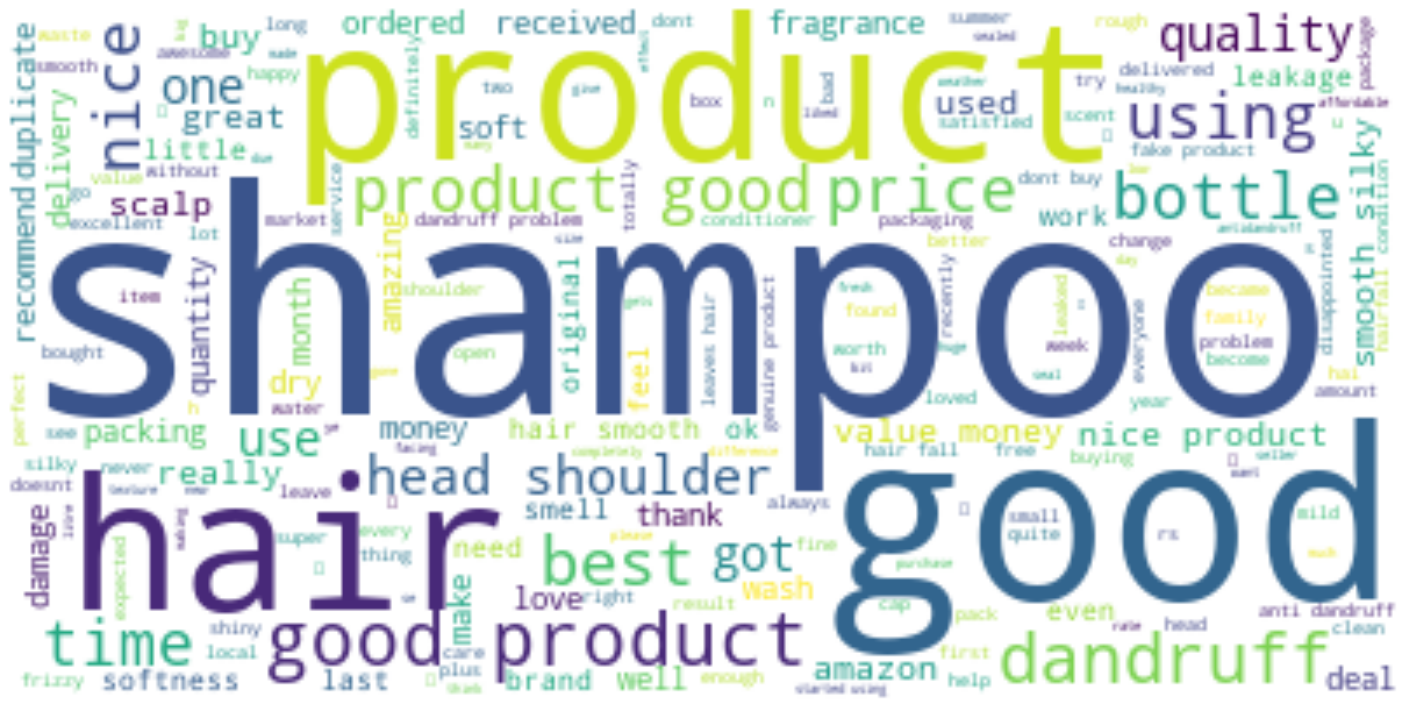

In [19]:
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## The above word cloud illustrates the keywords in the reviews
Note the presence of predominantly positive words

## Calculating the Sentiment Scores

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kvpai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
data.head()

review  Positive  Negative  Neutral
0       ok       1.0       0.0      0.0
1     good       1.0       0.0      0.0
2  bought        0.0       0.0      1.0
3     best       1.0       0.0      0.0
4  awesome       1.0       0.0      0.0

## Interpretation of the polarity scores:
The interpretation of the polarity/sentiment scores reveals the overall sentiment expressed in the customer reviews, ranging from positive to negative.

In [22]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Overall Positive")
    elif (b>a) and (b>c):
        print("Overall Negative")
    else:
        print("Overall Neutral")
sentiment_score(x, y, z)

Overall Positive


In [23]:
sentiment_percent = [['Positive', round(x/len(data)*100, 3)],
                     ['Negative', round(y/len(data)*100, 3)],
                     ['Neurtal', round(z/len(data)*100, 3)]]
sentiment_res = pd.DataFrame(sentiment_percent, columns=['Sentiment', 'Percentage'])
sentiment_res

Sentiment  Percentage
0  Positive      50.226
1  Negative       5.331
2   Neurtal      43.419

## Create a new dataframe
create a new dataframe with customers who had a bad experience with this product.

In [24]:
data_neg = data[(data['Negative']>data['Positive']) & (data['Negative']>data['Neutral'])]

In [25]:
data_neg.head(30)

review  Positive  Negative  \
177                 very good product damage packaging     0.331     0.359   
246                                          hard hair     0.000     0.583   
259               value moneybut packaging poor leaked     0.245     0.551   
283                                   poor performance     0.000     0.756   
304  waste moneyits duplicate thinkim facing proble...     0.000     0.524   
430             difficult comb using worthless product     0.000     0.643   
432                                      worst product     0.000     0.804   
437                        bad luck product got damage     0.256     0.573   
495                           damage dont like flooing     0.000     0.726   
497                               totally fake product     0.000     0.629   
505                                       fake product     0.000     0.756   
507                           damage product dil every     0.000     0.516   
508                                  defective product     0.000     0.744   
510                                      worst product     0.000     0.804   
512                                     product leaked     0.000     0.697   
518                                 bad leaked product     0.000     0.853   
524                                             damage     0.000     1.000   
537               product received leaked packing poor     0.000     0.643   

     Neutral  
177    0.311  
246    0.417  
259    0.204  
283    0.244  
304    0.476  
430    0.357  
432    0.196  
437    0.171  
495    0.274  
497    0.371  
505    0.244  
507    0.484  
508    0.256  
510    0.196  
512    0.303  
518    0.147  
524    0.000  
537    0.357

create a new dataframe with customers who had a good experience with this product.

In [26]:
data_pos = data[(data['Positive']>data['Negative']) & (data['Positive']>data['Neutral'])]
data_pos.head()

review  Positive  Negative  Neutral
0       ok       1.0       0.0      0.0
1     good       1.0       0.0      0.0
3     best       1.0       0.0      0.0
4  awesome       1.0       0.0      0.0
7     good       1.0       0.0      0.0

## Word Cloud: Negative Sentiments in Customer Reviews
This word cloud is created using words extracted from customer reviews with negative sentiment, providing a visual representation of the frequently occurring negative words and phrases. 

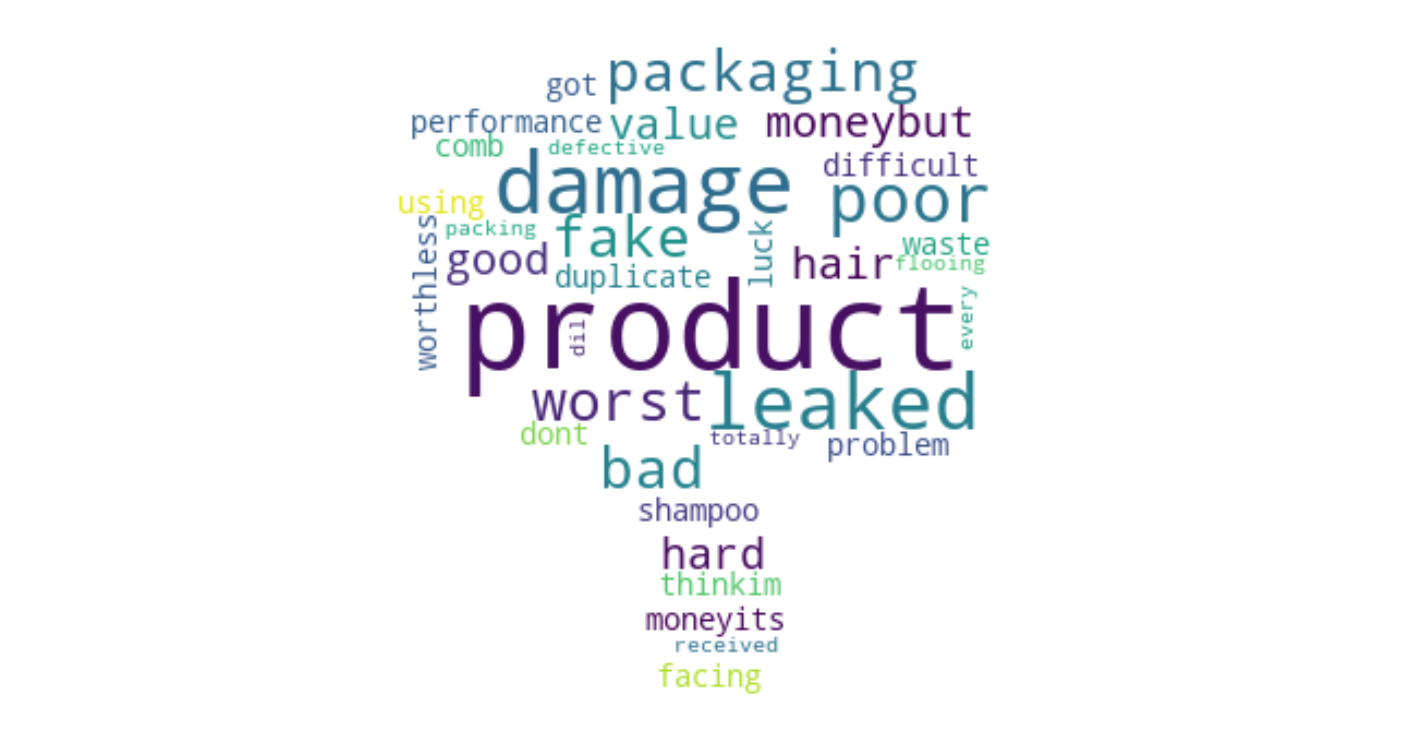

In [27]:
text = " ".join(i for i in data_neg.review)
stopwords = set(STOPWORDS)
mask = np.array(Image.open("assets/thumbs-down.jpg"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mask = mask, max_words=250).generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud: Positive Sentiments in Customer Reviews
This word cloud is generated by extracting words from customer reviews with positive sentiment, offering a visual representation of the frequently occurring positive words and phrases.. 

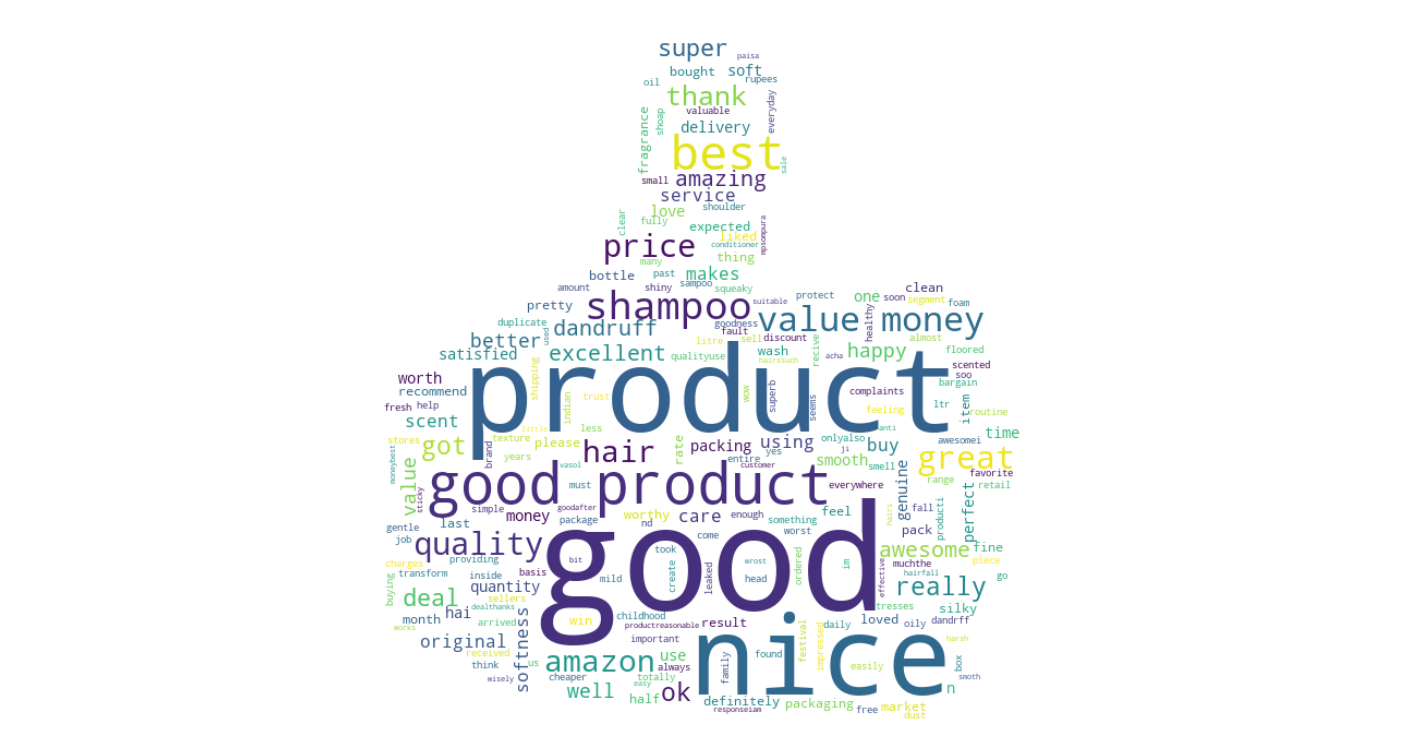

In [28]:
text = " ".join(i for i in data_pos.review)
stopwords = set(STOPWORDS)

mask = np.array(Image.open("assets/thumbs-up.jpg"))

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=250, mask=mask).generate(text)
plt.figure(figsize=(25,25))
# plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In conclusion, this Python notebook focused on analyzing customer ratings and sentiments. The data provided valuable insights into customer satisfaction levels, with a majority of customers giving positive ratings. The word cloud visualizations further highlighted the predominant positive or negative sentiments expressed in customer reviews. By understanding the sentiment polarity and analyzing the frequently occurring words, businesses can gain deeper insights into customer experiences and identify areas for improvement. This analysis serves as a valuable tool for enhancing customer satisfaction, making data-driven decisions, and refining products or services based on customer feedback.
